In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.patches import PathPatch

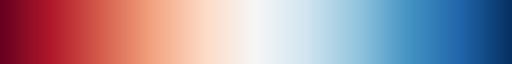

In [8]:
cmap = mpl.colormaps['RdBu'].resampled(256)  #创建色彩映射，有256种颜色
cmap

In [18]:
cmap = mpl.colormaps['RdBu'].resampled(256)(range(256))  #创建色彩映射，有256种颜色
cmap.shape  #分别为R、G、B、alpha。

(256, 4)

In [23]:
R=np.broadcast_to(cmap[:,0],(200,256)) #将(256,) 广播为(200,256)
G=np.broadcast_to(cmap[:,1],(200,256))
B=np.broadcast_to(cmap[:,2],(200,256))
alpha=np.full_like(R,1)   #创建一个与 R 形状和数据类型相同的新数组，但是数组中的所有元素都初始化为 1。
rgba=np.stack((R,G,B,alpha),axis=0)
rgba.shape  #(4, 200, 256)

(4, 200, 256)

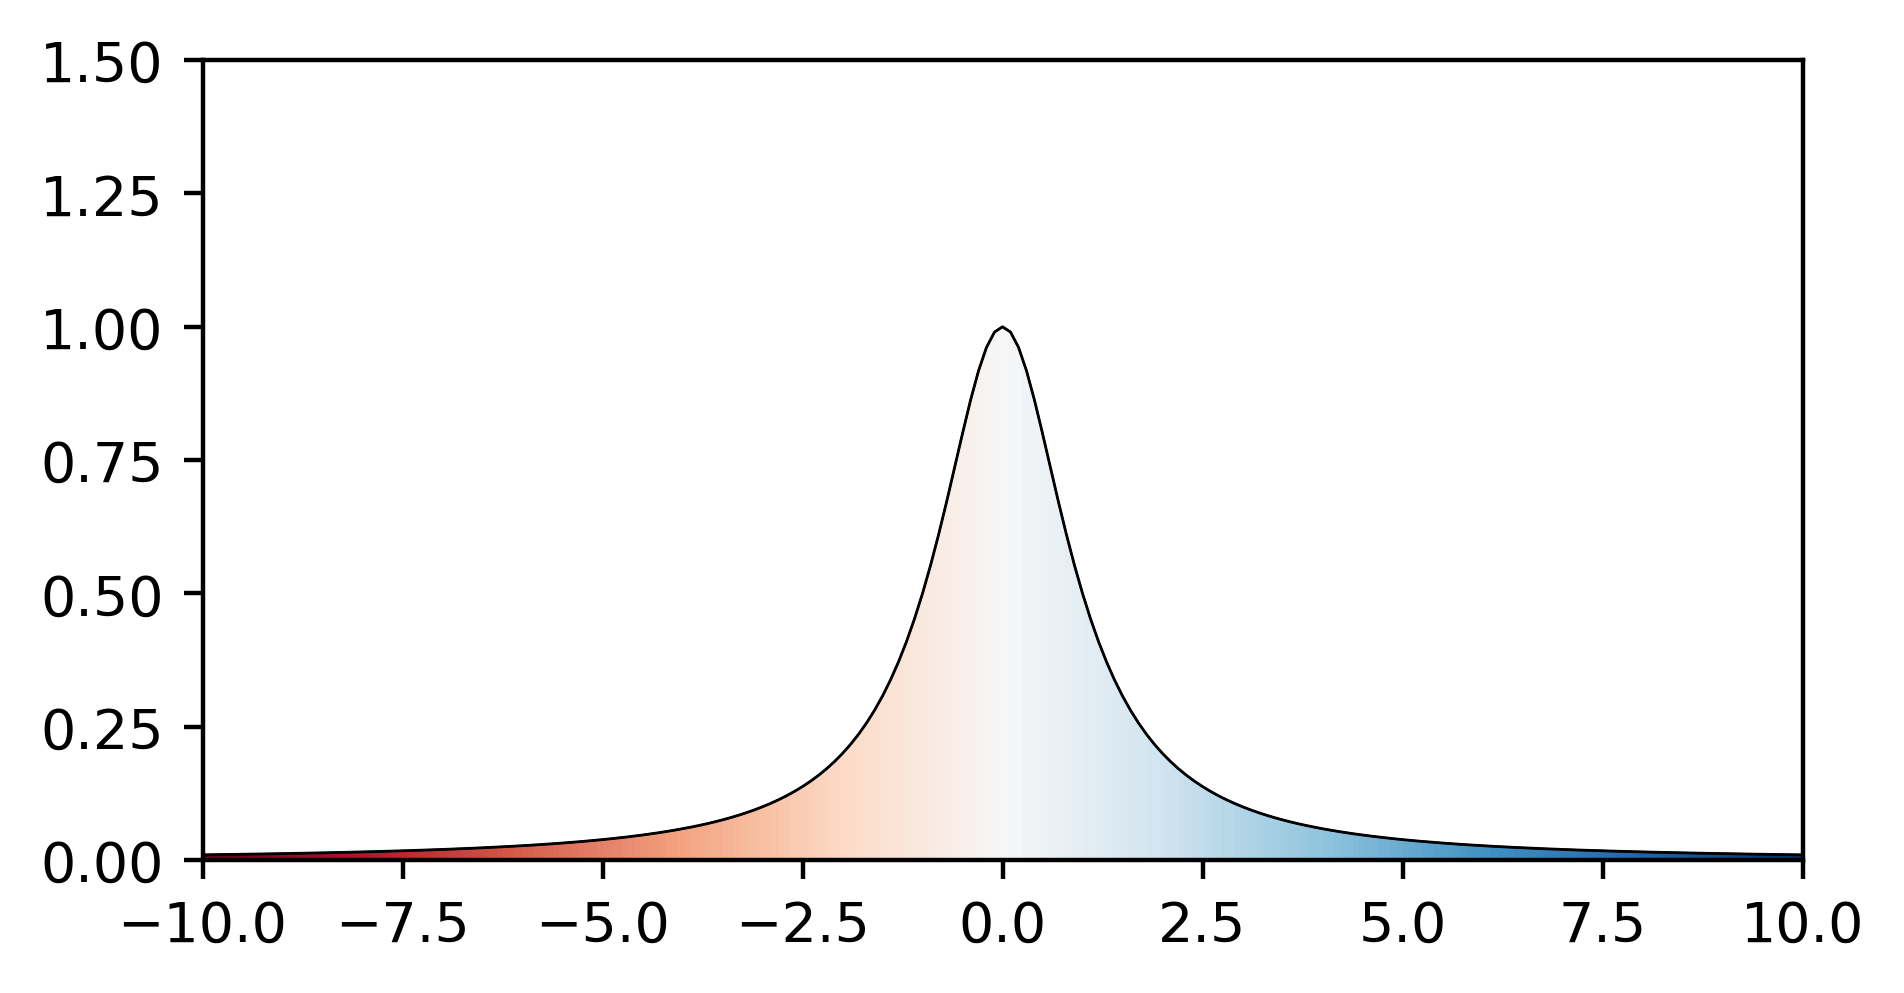

In [50]:
fig=plt.figure(figsize=(4,2),dpi=400)
ax=fig.add_axes([0,0,1,1])
ax.set(xlim=(-10,10),ylim=(0,1.5))  #根据数据设置好xlim 其它不变
x=np.arange(-10,10.1,0.1)
y=1/(x**2+1)
ax.plot(x,y,c='k',lw=0.5,zorder=5)
ax.fill_between(x,y,facecolor='none',lw=0.35,edgecolor='k',zorder=5)
patch=PathPatch(path._paths[0],visible=False,transform=ax.transData)
ai=ax.imshow(rgba.transpose((1,2,0)),extent=[0,1,0,1],transform=ax.transAxes)
ai.set_clip_path(patch)

In [32]:
from numba import guvectorize
x_data=np.broadcast_to(np.arange(-10,10.1,0.1),(25,201))
y_move=np.arange(-6,6.5,0.5)
@guvectorize(['void(float64[:],float64[:],float64[:])'],'(m),()->(m)',nopython=True)
def generate_func(x,move,out):
     out[:]=1/((x-move)**2+1)
y_data=generate_func(x_data,y_move)

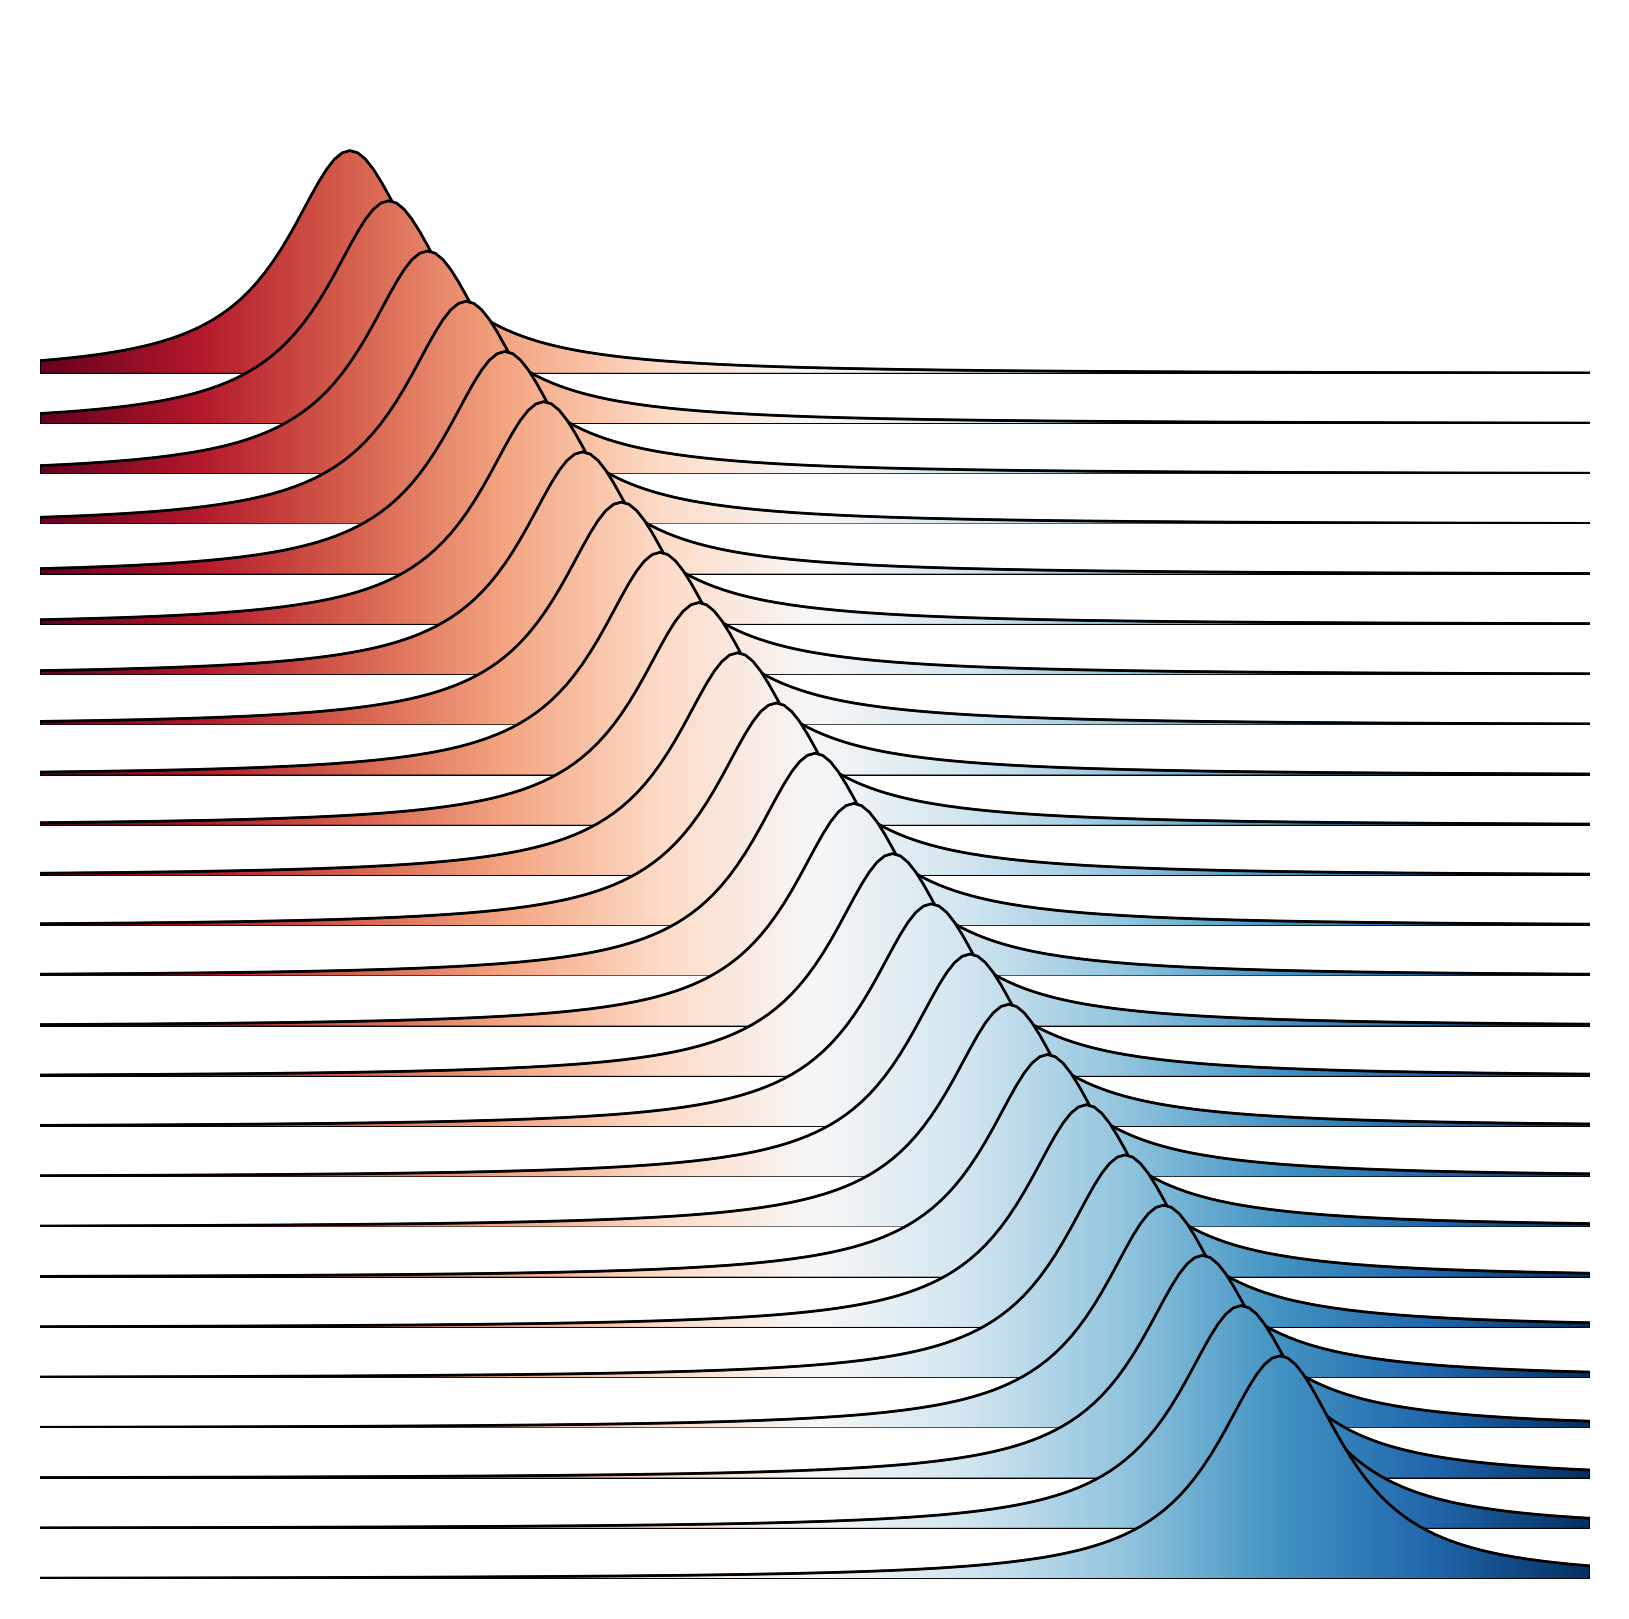

In [34]:
fig,axes=plt.subplots(25,1,figsize=(5,5),dpi=400)
fig.subplots_adjust(hspace=-0.85)
for i,ax in enumerate(axes.flatten()):
    ax.plot(x_data[0],y_data[i],c='k',lw=0.5,zorder=5)
    path=ax.fill_between(x_data[0],y_data[i],facecolor='none',lw=0.35,edgecolor='k',zorder=5)
    patch=PathPatch(path._paths[0],visible=False,transform=ax.transData)
    ax.set(xlim=(-10,10),ylim=(0,1.5))
    ai=ax.imshow(rgba.transpose((1,2,0)),extent=[0,1,0,1],transform=ax.transAxes)
    ai.set_clip_path(patch)
    ax.axis('off')